<a href="https://colab.research.google.com/github/Aparna-981/ict-project/blob/main/unsupervised_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Data Load

In [44]:
adult=pd.read_csv("/content/adult_dataset.csv")
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36.0,United-States,<=50K.
48838,64.0,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40.0,United-States,<=50K.
48839,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50.0,United-States,<=50K.
48840,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40.0,United-States,<=50K.


# EDA

In [45]:
adult.shape


(48842, 15)

In [46]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


In [47]:
adult.duplicated().sum()

np.int64(16)

In [48]:
adult.drop_duplicates(inplace=True)

In [49]:
adult.nunique()

,0
age,82
workclass,9
fnlwgt,28523
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2


In [50]:
print(adult['income'].unique())


['<=50K' '>50K' '<=50K.' '>50K.']


In [51]:
# Remove periods and extra spaces
adult['income'] =adult['income'].str.strip().str.replace('.', '', regex=False)

# Check unique values after cleaning
print(adult['income'].unique())


['<=50K' '>50K']


In [52]:
le= LabelEncoder()
adult['income']=le.fit_transform(adult['income'])
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,0
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,0
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,0
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,0
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,0


In [53]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,0
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,0
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,0
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,0
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,0


In [54]:
adult_data=adult.drop(['income'],axis=1)

In [55]:
adult_data.drop(['fnlwgt'],axis=1,inplace=True)

In [56]:
adult_data.nunique()

,0
age,82
workclass,9
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2
capital-gain,123


In [57]:
adult_data.isnull().sum()

,0
age,2442
workclass,3362
education,0
education-num,0
marital-status,0
occupation,3357
relationship,0
race,0
sex,0
capital-gain,0


In [58]:
adult_data.isin(['?']).any(axis=1,)

,0
0,False
1,False
2,False
3,False
4,False
...,...
48837,False
48838,False
48839,False
48840,False


In [59]:
adult_data[adult_data.isin(['?']).any(axis=1)].index

Index([   14,    27,    38,    51,    61,    69,    77,    93,   106,   128,
       ...
       32490, 32492, 32494, 32510, 32525, 32530, 32531, 32539, 32541, 32542],
      dtype='int64', length=2374)

In [60]:
adult_data[adult_data.isin(['NaN']).any(axis=1)].index

Index([], dtype='int64')

In [61]:
adult_data.replace('?', np.nan, inplace=True)

# handle missing value

In [62]:
adult_data.isnull().sum()

,0
age,2442
workclass,5125
education,0
education-num,0
marital-status,0
occupation,5115
relationship,0
race,0
sex,0
capital-gain,0


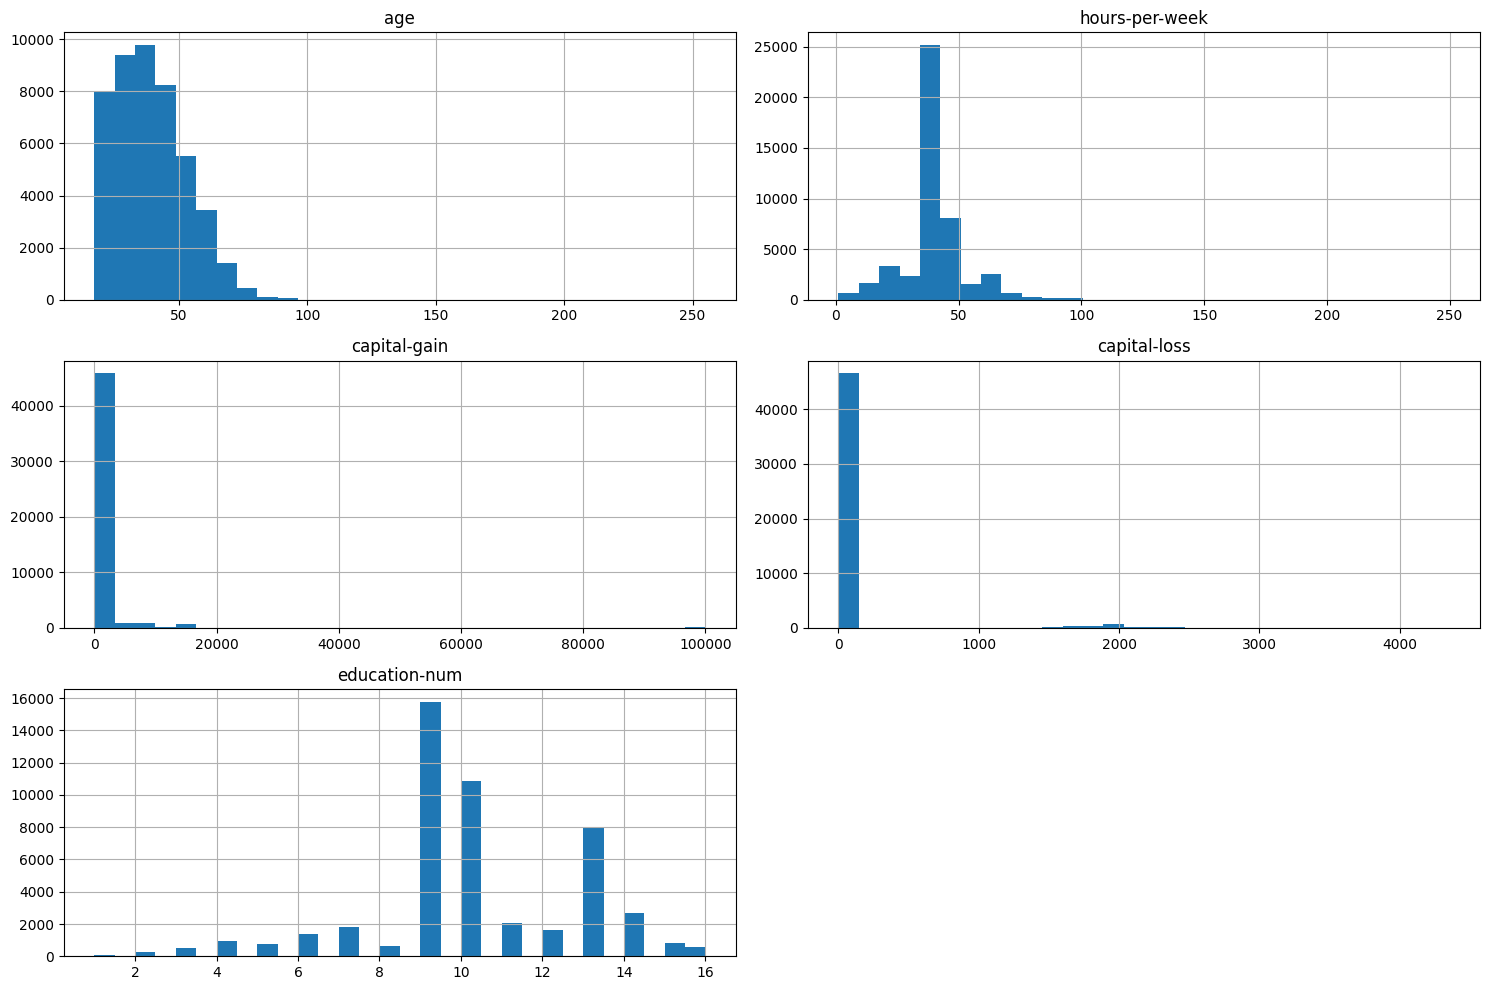

In [63]:
adult_data[['age','hours-per-week','capital-gain','capital-loss','education-num']].hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

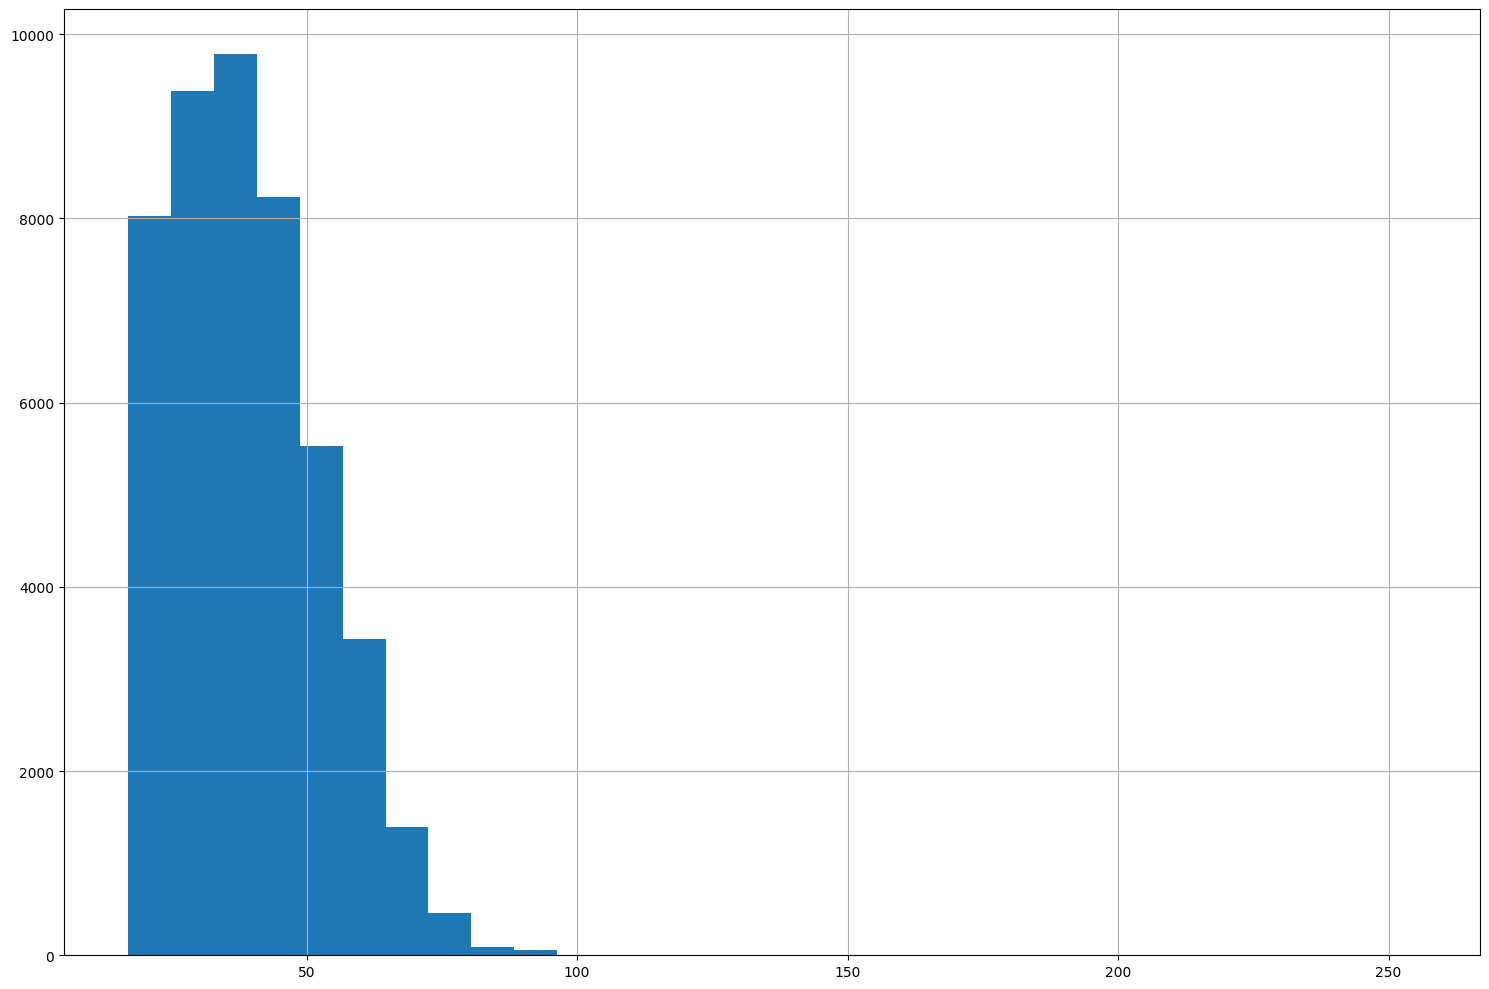

In [64]:
adult_data['age'].hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

### numerical value is replaced median

In [65]:
adult_data['age']=adult_data['age'].fillna(adult_data['age'].median())

In [66]:
adult_data['hours-per-week']=adult_data['hours-per-week'].fillna(adult_data['hours-per-week'].median())

In [67]:
adult_data['workclass'] = adult_data['workclass'].fillna(
    adult_data['workclass'].mode()[0]
)


### catergorial values is replaced by mode

In [68]:
adult_data['occupation'] = adult_data['occupation'].fillna(
    adult_data['occupation'].mode()[0]
)


In [69]:
adult_data['native-country'] = adult_data['native-country'].fillna(
    adult_data['native-country'].mode()[0]
)

In [70]:
adult_data.isnull().sum()


,0
age,0
workclass,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0
capital-gain,0


# Outlier Handling

<Axes: >

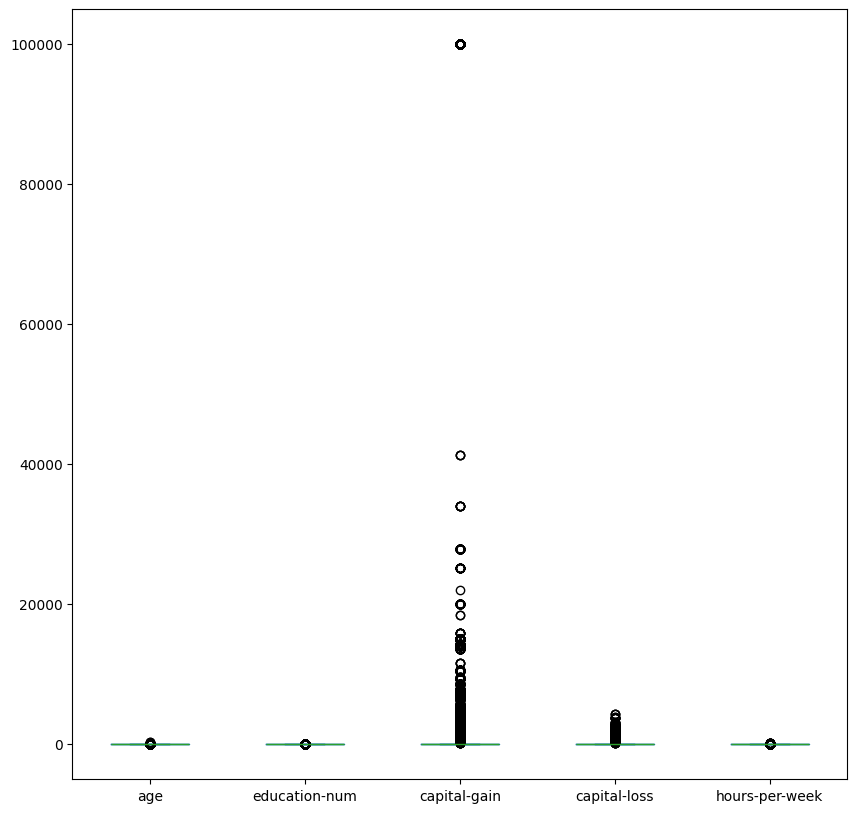

In [71]:
adult_data.plot(kind='box',figsize=(10,10))

In [72]:
num_cols = adult_data.select_dtypes(include=['int64', 'float64']).columns

outlier_summary = {}

for col in num_cols :
    Q1 = adult_data[col].quantile(0.25)
    Q3 = adult_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = adult_data[(adult_data[col] < lower) | (adult_data[col] > upper)]
    outlier_summary[col] = outliers.shape[0]

outlier_summary

{'age': 363,
 'education-num': 1792,
 'capital-gain': 4035,
 'capital-loss': 2282,
 'hours-per-week': 12833}

In [73]:
cols = [
   'age',
 'education-num',
 'hours-per-week',
   'capital-loss','capital-gain'
]
for col in cols:
    Q1 = adult_data[col].quantile(0.25)
    Q3 = adult_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    adult_data[col] = adult_data[col].clip(lower_limit, upper_limit)


<Axes: >

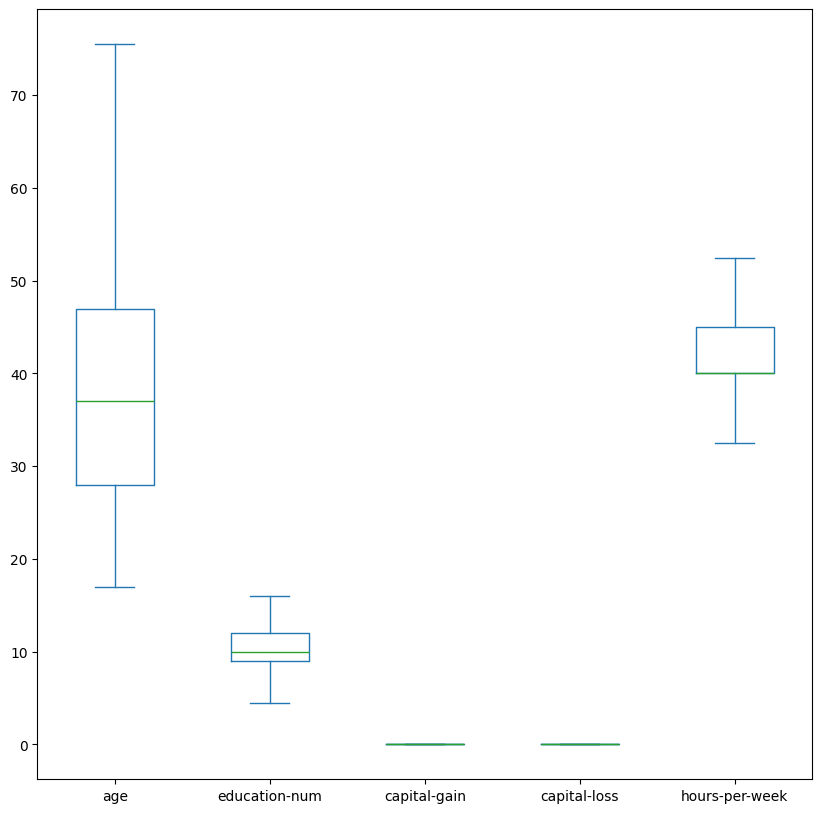

In [74]:
adult_data.plot(kind='box',figsize=(10,10))

# Encoding

In [75]:
adult_data.nunique()



,0
age,60
workclass,8
education,16
education-num,13
marital-status,7
occupation,14
relationship,6
race,5
sex,2
capital-gain,1


sex has only two unique values: Label encoder

In [76]:
le=LabelEncoder()
adult_data['sex']=le.fit_transform(adult_data['sex'])
adult_data


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,1,0,0,40.0,United-States
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,32.5,United-States
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40.0,United-States
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40.0,United-States
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,0,0,0,36.0,United-States
48838,64.0,Private,HS-grad,9.0,Widowed,Prof-specialty,Other-relative,Black,1,0,0,40.0,United-States
48839,38.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,1,0,0,50.0,United-States
48840,44.0,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,1,0,0,40.0,United-States


One hot

In [77]:
adult_data=pd.get_dummies(adult_data,columns=['workclass'],prefix=['mode'],drop_first=True,dtype=int)
adult_data=pd.get_dummies(adult_data,columns=['education'],prefix=['level'],drop_first=True,dtype=int)
adult_data=pd.get_dummies(adult_data,columns=['marital-status'],drop_first=True,dtype=int)
adult_data=pd.get_dummies(adult_data,columns=['occupation'],prefix=['type'],drop_first=True,dtype=int)
adult_data=pd.get_dummies(adult_data,columns=['relationship'],prefix=['type'],drop_first=True,dtype=int)
adult_data=pd.get_dummies(adult_data,columns=['race'],drop_first=True,dtype=int)
adult_data=pd.get_dummies(adult_data,columns=['native-country'],prefix=['count'],drop_first=True,dtype=int)


In [78]:
adult_data

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,mode_Local-gov,mode_Never-worked,mode_Private,mode_Self-emp-inc,...,count_Portugal,count_Puerto-Rico,count_Scotland,count_South,count_Taiwan,count_Thailand,count_Trinadad&Tobago,count_United-States,count_Vietnam,count_Yugoslavia
0,39.0,13.0,1,0,0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50.0,13.0,1,0,0,32.5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38.0,9.0,1,0,0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53.0,7.0,1,0,0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28.0,13.0,0,0,0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,13.0,0,0,0,36.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48838,64.0,9.0,1,0,0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48839,38.0,13.0,1,0,0,50.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,44.0,13.0,1,0,0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Scaling

In [79]:
cols=['age','hours-per-week','education-num']
scaler = StandardScaler()
adult_data[cols] = scaler.fit_transform(adult_data[cols])

In [80]:
adult_data.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,mode_Local-gov,mode_Never-worked,mode_Private,mode_Self-emp-inc,...,count_Portugal,count_Puerto-Rico,count_Scotland,count_South,count_Taiwan,count_Thailand,count_Trinadad&Tobago,count_United-States,count_Vietnam,count_Yugoslavia
0,0.035123,1.171344,1,0,0,-0.187370,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.864064,1.171344,1,0,0,-1.430414,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.040236,-0.456772,1,0,0,-0.187370,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1.090139,-1.270830,1,0,0,-0.187370,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.793819,1.171344,0,0,0,-0.187370,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


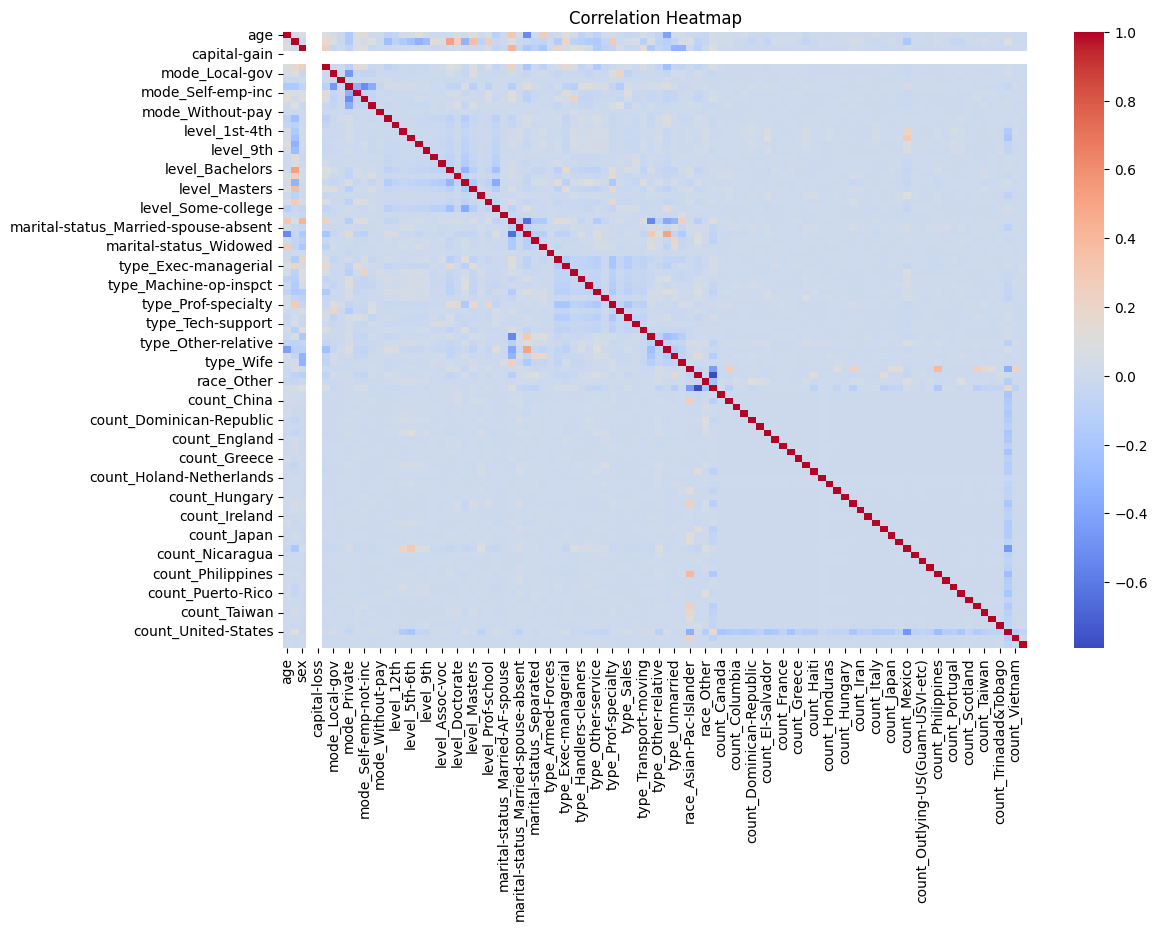

In [81]:
plt.figure(figsize=(12,8))
sns.heatmap(adult_data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()
#

# PCA

In [82]:
pca = PCA()
X_pca = pca.fit_transform(adult_data)

In [83]:
np.cumsum(pca.explained_variance_ratio_)

array([0.21217755, 0.37645912, 0.50836861, 0.56818195, 0.60695818,
       0.64077647, 0.67226046, 0.70009958, 0.72755204, 0.75210389,
       0.77482186, 0.7918362 , 0.80849843, 0.82321033, 0.83705082,
       0.85009051, 0.86252291, 0.87286778, 0.88259974, 0.89224846,
       0.89997357, 0.90706474, 0.9136401 , 0.92000839, 0.92558561,
       0.9311393 , 0.93636261, 0.94151319, 0.94628988, 0.95088714,
       0.95540793, 0.95951455, 0.96352507, 0.96665496, 0.96968127,
       0.97249128, 0.97512675, 0.97728953, 0.97941778, 0.98144716,
       0.98315523, 0.98479963, 0.98627315, 0.98746832, 0.98840952,
       0.989171  , 0.98990584, 0.99055209, 0.99113585, 0.99166726,
       0.9921583 , 0.99260651, 0.99303706, 0.99345714, 0.99385009,
       0.9942107 , 0.9945568 , 0.99488439, 0.99519653, 0.99550339,
       0.99579983, 0.99608345, 0.99634813, 0.99660527, 0.99685757,
       0.99710624, 0.99734041, 0.99756538, 0.99777805, 0.99798463,
       0.99816477, 0.99833353, 0.9984836 , 0.99862726, 0.99876

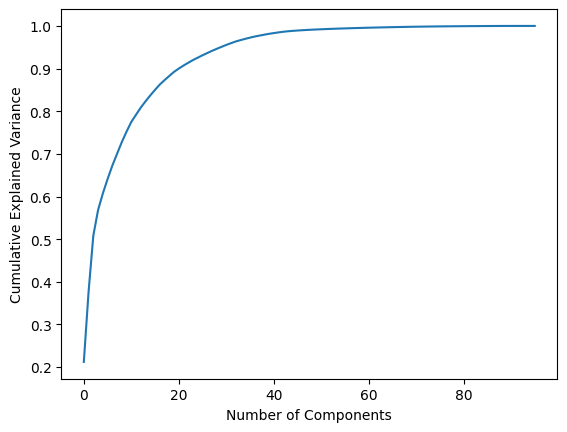

In [84]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [85]:
pca = PCA(n_components=0.90)
adult_pca = pca.fit_transform(adult_data)

<function matplotlib.pyplot.show(close=None, block=None)>

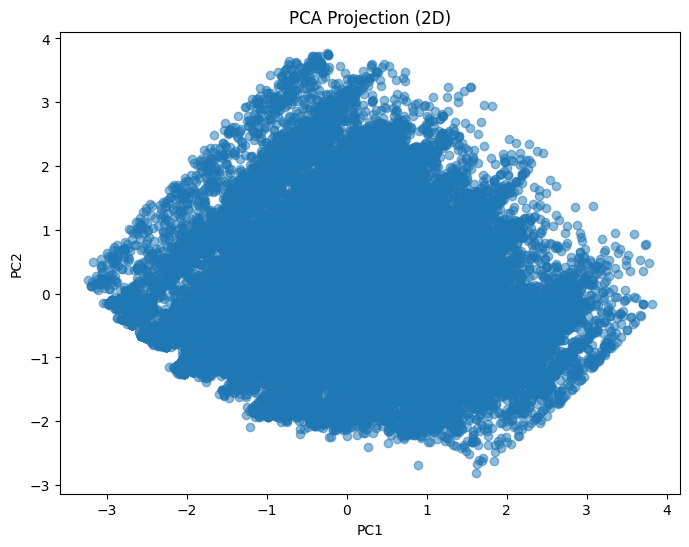

In [86]:
plt.figure(figsize=(8,6))
plt.scatter(adult_pca[:,0], adult_pca[:,1], alpha=0.5)
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show

convert to dataframe

In [87]:
pca_data = pd.DataFrame(
    adult_pca,
    columns=[f'PC{i+1}' for i in range(adult_pca.shape[1])]
)

In [88]:
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
0,0.529468,-1.060567,-0.812379,-0.563055,0.148471,0.831088,-0.733406,-0.040561,-0.337199,-0.221485,...,0.141076,-0.020629,-0.127116,0.283848,-0.167564,-0.268165,0.261238,0.107963,-0.011302,0.696186
1,0.760304,0.047910,-1.999977,0.900818,0.048396,0.322341,-0.707199,-0.491786,-0.431609,-0.134552,...,-0.333596,-0.121927,-0.406049,-0.062117,-0.249157,0.622628,0.199192,-0.171562,0.005914,-0.280563
2,-0.449516,0.415629,0.208313,-0.357012,0.694243,0.602966,0.156931,-0.117091,-0.095501,-0.329868,...,-0.053571,-0.377587,-0.070448,0.087377,-0.008615,-0.126207,-0.179195,-0.349513,-0.347698,-0.014911
3,-0.114005,1.767627,0.118906,0.245680,-0.321740,-0.402602,0.178119,0.904202,-0.837664,-0.149116,...,-0.047121,-0.008443,-0.148932,0.060911,0.632105,-0.016747,0.101570,-0.046467,-0.311287,-0.032297
4,0.302376,-1.298965,-0.672897,0.497444,0.154764,-1.415337,0.393812,0.893326,-0.113265,-0.868396,...,0.105177,0.583830,-0.068066,-0.192586,-0.515545,0.042494,0.020440,-0.038910,-0.087281,-0.087874


# Clustering

K - means Clustering

In [89]:
wcss=[]
sil=[]

for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init= 'k-means++',max_iter=300,n_init=9,random_state=0)
  kmeans.fit(pca_data)
  wcss.append(kmeans.inertia_)
  labels=kmeans.predict(pca_data)
  sil_score=silhouette_score(pca_data,labels)
  print('wcss and silohouette score for K= {} is {} and {}'.format(i,kmeans.inertia_,sil_score))
  sil.append(sil_score)
wcss

wcss and silohouette score for K= 2 is 247526.14220760087 and 0.14991684533644486
wcss and silohouette score for K= 3 is 215543.45915064128 and 0.1517664878549873
wcss and silohouette score for K= 4 is 196065.17756616673 and 0.15329716255455336
wcss and silohouette score for K= 5 is 185382.0264325081 and 0.12569562547621663
wcss and silohouette score for K= 6 is 175435.43233642326 and 0.1313896163766315
wcss and silohouette score for K= 7 is 168494.87948801942 and 0.13426009669132383
wcss and silohouette score for K= 8 is 162551.375233585 and 0.13517471012540333
wcss and silohouette score for K= 9 is 156884.33210865717 and 0.13354853476425135
wcss and silohouette score for K= 10 is 152757.7033470095 and 0.1260376845379268


[247526.14220760087,
 215543.45915064128,
 196065.17756616673,
 185382.0264325081,
 175435.43233642326,
 168494.87948801942,
 162551.375233585,
 156884.33210865717,
 152757.7033470095]

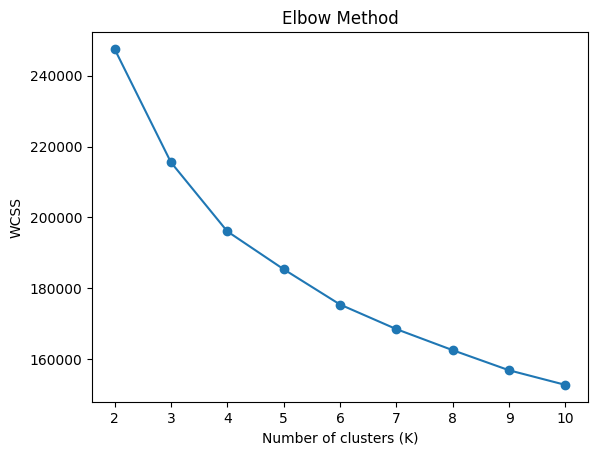

In [90]:
plt.plot(range(2,11), wcss, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


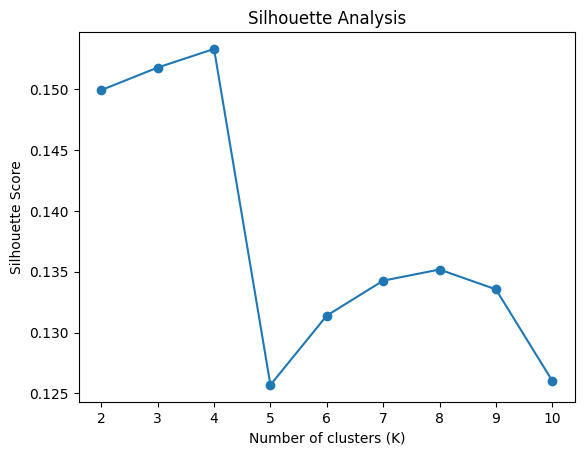

In [91]:
plt.plot(range(2,11), sil, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()


In [92]:
kmeans = KMeans(
    n_clusters=4,
    init='k-means++',
    random_state=0,
    max_iter=300,
    n_init=10
)

kmeans_labels = kmeans.fit_predict(adult_pca)
adult_data['kmeans_clusters'] = kmeans_labels


In [93]:
adult_data['kmeans_clusters']

,kmeans_clusters
0,0
1,0
2,1
3,1
4,0
...,...
48837,0
48838,1
48839,3
48840,0


In [94]:
#pca = PCA(n_components=2)
#adult_pca1 = pca.fit_transform(adult_data)


In [95]:

#pca_data = pd.DataFrame(adult_pca1, columns=['PC1', 'PC2'])


In [96]:
#pca_data['kmeans_clusters'] = labels

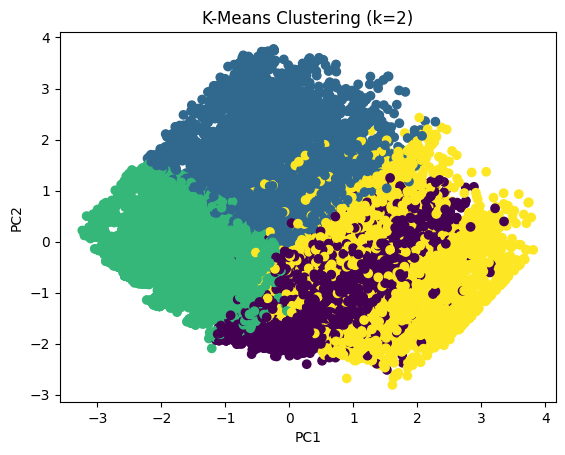

In [97]:
plt.scatter(adult_pca[:,0], adult_pca[:,1],
            c=adult_data['kmeans_clusters'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clustering (k=2)")
plt.show()


In [98]:
comparison_df=pd.crosstab(adult_data['kmeans_clusters'],adult['income'])
display(comparison_df)

income,0,1
kmeans_clusters,,
0,6059,3908
1,11093,2981
2,14095,457
3,5892,4341


# agglomerative clustering

In [99]:
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering

X=np.array(pca_data)

In [100]:
"""
for i in range(2,11):

  hc=AgglomerativeClustering(n_clusters=i,linkage='ward')
  hc_labels=hc.fit_predict(X)
  sil_score=silhouette_score(X,hc_labels)
  print('silohouette score for K= {} is {} '.format(i,sil_score))
  """

"\nfor i in range(2,11):\n\n  hc=AgglomerativeClustering(n_clusters=i,linkage='ward')\n  hc_labels=hc.fit_predict(X)\n  sil_score=silhouette_score(X,hc_labels)\n  print('silohouette score for K= {} is {} '.format(i,sil_score))\n  "

In [ ]:
hc=AgglomerativeClustering(n_clusters=5,linkage='ward')
hc_labels=hc.fit_predict(X)
adult_data['hc_cluster']=hc_labels
adult_data.head()